
# **Genre songs classification**
based on lyrics


Comparison of the various NLP algorithms with Kegel Dataset
Submitted as final project report for the NLP course, Reichman University, 2022

***imports***

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
nltk.download('SnowballStemmer')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from datetime import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index


In [2]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2022-08-14 18:49:21--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2022-08-14 18:49:21--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.18K  --.-KB/s    in 0s      

2022-08-14 18:49:21 (49.2 MB/s) - written to stdout [1212/1212]

Installing PySpa

open and read data

In [3]:
train = pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False)
train = train.dropna()

In [4]:
display(train)

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [5]:
train.Genre.value_counts()


Rock          121390
Pop           108693
Metal          20286
Jazz           13545
Folk            8644
Indie           8449
R&B             2793
Hip-Hop         2240
Electronic      2213
Country         1890
Name: Genre, dtype: int64

In [6]:
train.Language.value_counts()


en    250196
pt     30102
es      3892
ro      1184
it       808
id       737
fr       644
de       478
sw       304
so       229
cy       226
tl       206
ca       137
tr       116
nl       116
sk        98
hr        97
no        93
sl        77
af        77
da        71
sv        61
et        58
fi        54
pl        24
cs        17
sq        15
hu        10
vi         7
ru         4
lt         2
lv         2
ko         1
Name: Language, dtype: int64

In [7]:
train = train.drop(train[train['Language'] !='en'].index)

In [8]:
train.Genre.value_counts()



Rock          107144
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: Genre, dtype: int64

In [9]:
train['Genre'] = train['Genre'].replace(['Folk','R&B'],['Indie','Hip-Hop'])

In [10]:
train.Genre.value_counts()


Rock          107144
Pop            86298
Metal          19133
Indie          15409
Jazz           13314
Hip-Hop         5003
Electronic      2005
Country         1890
Name: Genre, dtype: int64

In [11]:
display(train)

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,Hip-Hop,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [12]:
train = train.groupby("Genre").filter(lambda x: len(x) > 3000)


In [13]:
genre_list = train.Genre.unique()

In [14]:
genre_list

array(['Rock', 'Metal', 'Pop', 'Indie', 'Hip-Hop', 'Jazz'], dtype=object)

In [15]:
train = train.groupby('Genre').head(1200)

In [16]:
train.Genre.value_counts()


Rock       1200
Metal      1200
Pop        1200
Indie      1200
Hip-Hop    1200
Jazz       1200
Name: Genre, dtype: int64

clean data


In [17]:
def remove_stopwords(text, stop_words):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [18]:
def stemming(text, stemmer):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [19]:
def preprocess(data):
  #convert text to lowercase
  data["Lyric_lower"] = data["Lyrics"].str.lower()

  #remove special characters, punctuations
  data["Lyric_no_spec"] = data["Lyric_lower"].str.replace(r'[^a-zA-Z\s]+', '')

  #remove stop words
  stop_words = set(stopwords.words('english'))
  data["Lyric_no_stop"] = data["Lyric_no_spec"].apply(lambda text: remove_stopwords(text, stop_words))

  #steam 
  stemmer = SnowballStemmer('english')
  data["cleaned_lyrics"] = data["Lyric_no_stop"].apply(lambda text: stemming(text, stemmer))



In [20]:
preprocess(train)

In [21]:
train = train[["cleaned_lyrics", "Genre"]]
train.columns = ["Lyrics", "Genre"]

In [22]:
display(train)

,Lyrics,Genre
0,start pain follow hate fuel endless question o...,Rock
1,freedom alon alon patient wait phone hope call...,Rock
2,bite hand feed lie voic insid reach beg someth...,Rock
3,say know cant imagin wait across line thought ...,Rock
4,heart beat faster cant control feel anymor ive...,Rock
...,...,...
253697,seen thing live weve long sorrow road that kno...,Hip-Hop
253698,find new experi someon never thought meet tota...,Hip-Hop
253699,could ever hide felt could ever say never knew...,Hip-Hop
253700,anoth day chanc make anoth chanc fragil place ...,Hip-Hop


In [23]:
test = pd.read_csv('test.csv', engine='python', encoding='utf-8', error_bad_lines=False)
test = test.dropna()
test['Genre'] = test['Genre'].replace(['Folk','R&B'],['Indie','Hip-Hop'])
test = test[test['Genre'].isin(genre_list)]



In [24]:
preprocess(test)

test = test.groupby('Genre').head(70)
test = test.reset_index()
test = test[["cleaned_lyrics", "Genre"]]
test.columns = ["Lyrics", "Genre"]

In [25]:
display(test)


,Lyrics,Genre
0,folk spend day daydream find clue whole life i...,Hip-Hop
1,take cold hand put face sharpen axe crimin way...,Indie
2,readi time war well break fuck door smash wind...,Metal
3,ask chang color hair yeah ask need thirti two ...,Pop
4,believ magic young girl heart music free whene...,Hip-Hop
...,...,...
415,littl im feel less sour promis treat visit nea...,Jazz
416,tri succeed everyth scare possess everyth that...,Jazz
417,ive got skin got deep heart deep heart your re...,Jazz
418,blue gardenia im alon oh blue toss us asid lik...,Jazz


creat classifaction class



In [26]:
class Classification:
  def __init__(self, test, train, n_gram, minimum_lyric_appearance):
          # Matrix having columns: Genre | Lyrics
          self.train = train
          self.test = test
          self.train_words, self.test_words = self.get_words()
          self.train_tfidf = self.calculate_tf_idf()
          # n_gram = 1 => Only unigram, n_gram = 2 => Unigram + bigram etc.
          self.ngram = n_gram

          # Minimum number of lyrics a word needs to appear in, in order to get a weight.
          self.minimum_lyric_appearance = minimum_lyric_appearance

          # {Name of model : Object of model}
          self.classification_models = {"naive_bayes": None, 'logistic_regression':None}

  def get_words(self):
    count_vector = CountVectorizer(strip_accents="ascii", stop_words="english", analyzer="word", ngram_range=(1, 1))
    count_vector.fit(self.train["Lyrics"].values)
    train_words = count_vector.transform(self.train["Lyrics"].values)
    test_words = count_vector.transform(self.test["Lyrics"].values)

    return train_words, test_words
  
  def calculate_tf_idf(self):
        tfidf_transformer = TfidfTransformer(smooth_idf=True, sublinear_tf = True)
        tf_idf = tfidf_transformer.fit_transform(self.train_words)
        return tf_idf

  def logistic_regression(self):
    return LogisticRegression(solver="lbfgs", max_iter=1000, multi_class="auto", random_state=0).fit(self.train_words.toarray(), self.train["Genre"].values)
  
  def naive_bayes(self):
    return MultinomialNB().fit(self.train_words.toarray(), self.train["Genre"].values)
  
  def BERT(self):
    pass
  
  def create_models_and_predicts(self):
    # for model in self.classification_models:
    #   model_object = eval(f"self.{model}()")
    #   self.classification_models[model] = (model_object, model_object.predict(self.test_words.toarray()))
    for model in self.classification_models:
      self.classification_models[model] = eval(f"self.{model}()")


In [27]:
c = Classification(test=test, train=train, n_gram=5, minimum_lyric_appearance=150 )

In [28]:
model = c.create_models_and_predicts()

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

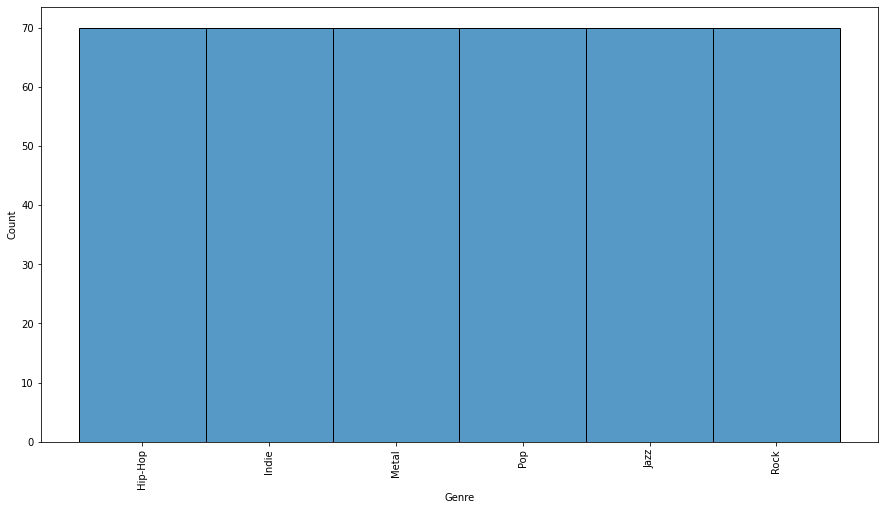

In [29]:
plt.figure(figsize = (15,8))
g = sns.histplot(data=test, x="Genre")
plt.xticks(rotation=90)

naive_bayes


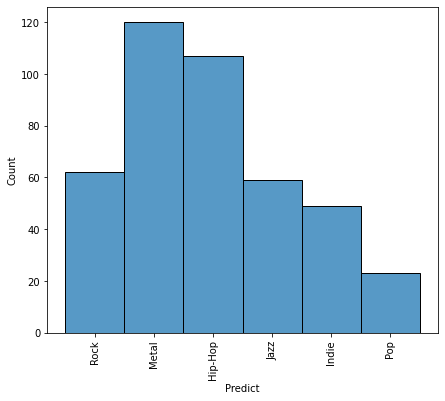

presentage of sucsess model naive_bayes = 0.3619047619047619
logistic_regression


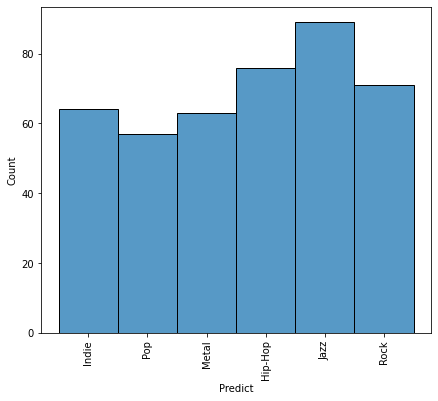

presentage of sucsess model logistic_regression = 0.3047619047619048


In [30]:
data = {}
cq = c.classification_models
for name, model in cq.items():
  print(name)
  data_ = []
  for i in range(c.test_words.shape[0]):
    real = test.iloc[i]["Genre"]
    predict = model.predict(c.test_words[i].toarray())[0]
    data_.append([test.iloc[i]["Genre"], predict, real == predict])
  data[name] = pd.DataFrame(data_,columns=['Real', 'Predict', 'Match'])
  plt.figure(figsize = (7,6))
  g = sns.histplot(data=data[name], x="Predict")
  plt.xticks(rotation=90)
  plt.show()

  print(f'presentage of sucsess model {name} = {data[name]["Match"].sum() / test.shape[0]}')

**BERT model**
from nlu

In [31]:
BERT=nlu.load("en.classify.song_lyrics")
genre_list = genre_list[genre_list != 'Jazz']
test = test[test['Genre'].isin(genre_list)]
test['BERT'] = test.apply(lambda row: BERT.predict(row.Lyrics), axis = 1)

bert_sequence_classifier_song_lyrics download started this may take some time.
Approximate size to download 391.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


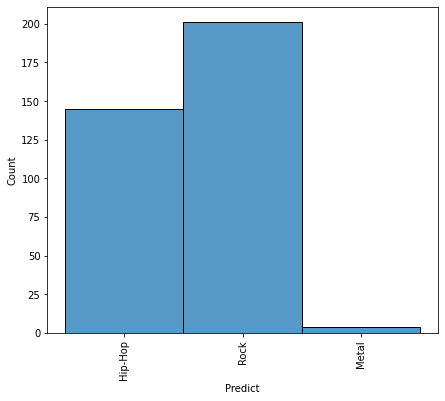

presentage of sucsess model Bert = 0.29714285714285715


In [32]:
test['Predict'] = test.apply(lambda row: row.BERT.classified_sequence, axis = 1)
test['Predict'] = test['Predict'].replace(['Heavy Metal','Hip Hop'],['Metal', 'Hip-Hop'])
test['Match'] = test.apply(lambda row: row.Genre == row.Predict, axis = 1)
test
plt.figure(figsize = (7,6))
g = sns.histplot(data=test, x="Predict")
plt.xticks(rotation=90)
plt.show()

print(f'presentage of sucsess model Bert = {test["Match"].sum() / test.shape[0]}')



In [33]:
test

,Lyrics,Genre,BERT,Predict,Match
0,folk spend day daydream find clue whole life i...,Hip-Hop,classified_sequence classified_sequence_conf...,Hip-Hop,True
1,take cold hand put face sharpen axe crimin way...,Indie,classified_sequence classified_sequence_conf...,Hip-Hop,False
2,readi time war well break fuck door smash wind...,Metal,classified_sequence classified_sequence_conf...,Rock,False
3,ask chang color hair yeah ask need thirti two ...,Pop,classified_sequence classified_sequence_conf...,Hip-Hop,False
4,believ magic young girl heart music free whene...,Hip-Hop,classified_sequence classified_sequence_conf...,Rock,False
...,...,...,...,...,...
396,day still begin light light time mark hundr wa...,Metal,classified_sequence classified_sequence_conf...,Rock,False
398,cold cold cant control light cigarett caus mig...,Metal,classified_sequence classified_sequence_conf...,Rock,False
399,im light candl victim around world pointless d...,Metal,classified_sequence classified_sequence_conf...,Rock,False
400,fighter ignit storm intrud defend chosen fight...,Metal,classified_sequence classified_sequence_conf...,Rock,False


**Lyrics Visualzation**

In [34]:
def all_text(text):
  text = text.reset_index()

  text = text['Lyrics']
  text= text.to_string()
  text = text.replace("\n", "")
  text = ''.join([i for i in text if not i.isdigit()])
  return text

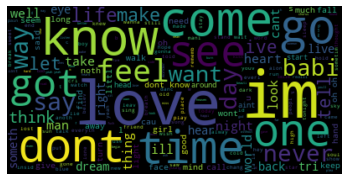

In [35]:
all = train
text = all_text(all)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

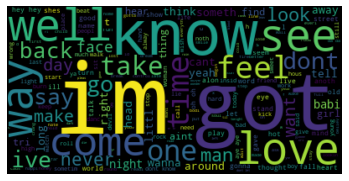

In [36]:
rock = train[train['Genre'].isin(['Rock'])]
text = all_text(rock)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

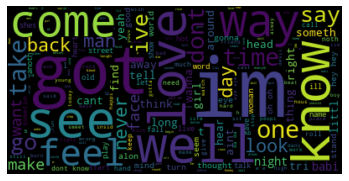

In [37]:
pop = train[train['Genre'].isin(['Pop'])]
text = all_text(rock)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()